### Student details

**Student name:** Muhammad Khubaib Akram

**Student ID:** 23098929

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [4]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [5]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

In [6]:
import pandas as pd

# Read the data from the .csv, using the first row as the headers of the data
url = 'https://github.com/johnmyleswhite/ML_for_Hackers/blob/master/02-Exploration/data/01_heights_weights_genders.csv?raw=true'

data = pd.read_csv(url, header=0) # Read the csv file using the pandas
print(data.head())

# X is the features in our dataset, Getting Height and weight
X = data.iloc[:,1:3].values

# y is the Labels in our dataset,
y = data.iloc[:,0].values

# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1) #converted to integers, Gender values 1 for Male and -1 for Female

print(X[0:5]) # Hight and Weigth
print(y[0:5]) # Gender values 1 for Male and -1 for Female

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 [ 71.7309784  220.0424703 ]
 [ 69.88179586 206.34980062]]
[-1 -1 -1 -1 -1]


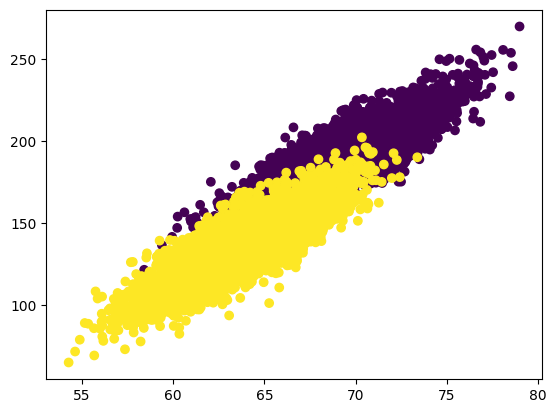

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split
(provided - should be completed in previous E-tivity)

In [8]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train the algorithm (Task)

Weights: [  1.56        88.08061743 -34.1463852 ]


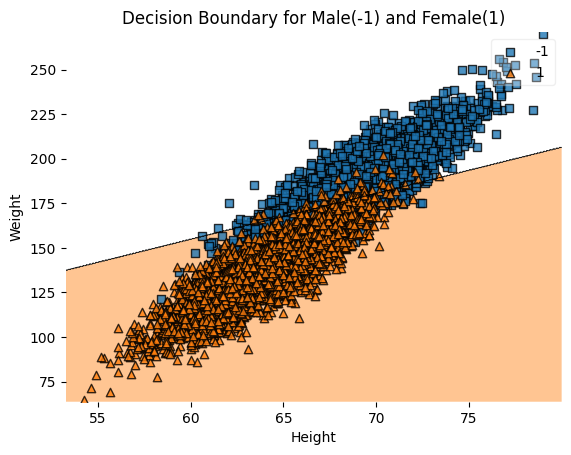

In [22]:
#create an object of Perceptron with eta= 0.01 and 50 epoch
ppn = Perceptron(eta=0.01, epochs=50)

#training the perceptron
ppn.train(X_train, y_train)

print('Weights: %s' % ppn.w_)

# importing plot_decision_regions from mlxtend.plotting
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf=ppn)

plt.title('Decision Boundary for Male(-1) and Female(1)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [10]:
################################
# Your code here
from sklearn.metrics import accuracy_score

# Predicting on Test data
y_pred = ppn.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8545454545454545


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable


[1228, 940, 907, 897, 866, 852, 833, 870, 847, 842, 827, 839, 849, 829, 835, 831, 864, 848, 836, 846, 840, 857, 834, 827, 831, 834, 855, 847, 840, 837, 842, 848, 831, 821, 846, 866, 831, 844, 836, 829, 835, 831, 864, 839, 839, 849, 829, 835, 827, 870]


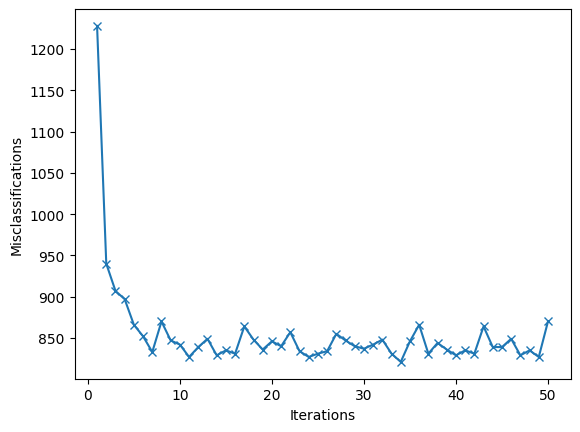

In [11]:
################################
# Your code here
print(ppn.errors_)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='x')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

[ 78.99874235 269.98969851]
[43.35557659 47.61754864 33.46819634 ... 58.10375144 31.37445587
  1.87917685]
[193.0937614  147.1128463  174.38475685 ... 148.61497096 204.76815763
 219.65689055]


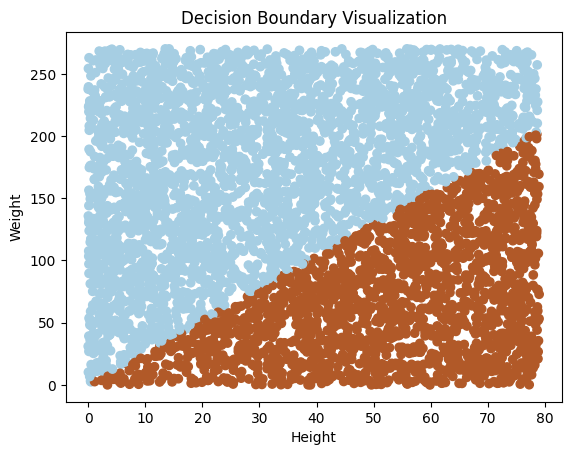

In [20]:
np.random.seed(0)

# Generate random inputs within the range of the maximum values in X
random_inputs = np.random.rand(5000, 2) * X.max(axis=0)

print( X.max(axis=0))
print(random_inputs[:, 0])
print(random_inputs[:, 1])
# Use the trained perceptron to make predictions

predictions = ppn.predict(random_inputs)

# Plot the decision boundary using scatter plot
plt.scatter(random_inputs[:, 0], random_inputs[:, 1], c=predictions, cmap=plt.cm.Paired)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Decision Boundary Visualization')
plt.show()




### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


**1. Describe what is happening as the training progresses?**

During the course of training, the perceptron algorithm acquires the ability to identify a decision boundary that distinguishes between the data points, Male and Female. It accomplishes this by modifying its weights and bias in order to minimize errors in classification.

The algorithm makes weight adjustments based on instances of data points that it has classified incorrectly, thereby gradually fine-tuning the decision boundary until convergence is achieved or until a predetermined number of training epochs has been completed.

**2. Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?**

We did not arrive at the best solution at the last epoch. There are epochs with lower error during training, but the algorithm continues to make minor adjustments in subsequent epochs. Thats why we did not arrive at the very best solution at the last epoch. The data is not perfectly separable the algorithm oscillates around a solution



**3. Why can’t we get zero error with this data?**

Because the data is not perfectly separable as there are some overlapping regions between the male and female data which cannot be accurately separated by a straight line.
We get zero error when the data is perfectly separable. :

###Create a copy of the Perceptron class,
1. Rename it to something reasonable, like PerceptronEE.
2. Implement an early exit, to exit the training once convergence has been achieved, i.e. once the error is at an acceptable level.

In [14]:
class PerceptronEE(object):

    def __init__(self, eta=0.01, epochs=50, max_error=821):
        self.eta = eta
        self.epochs = epochs
        self.max_error = max_error

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)

            #Checking for an early Exit
            if errors <= self.max_error:
              print(f"Converged at epoch {self.epochs + 1}. Error: {errors}")
              break
        print(f"Erros = {self.errors_} and Length of Errors = {len(self.errors_)}")

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [15]:
# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Training the data based on Modified Class PerceptronEE Object
perceptronEE = PerceptronEE(eta=0.01, epochs=50, max_error=827)

perceptronEE.train(X_train, y_train)


#Predicting using the test data
y_pred_ppn_ee = perceptronEE.predict(X_test)

# Calculate the accuracy score
accuracyEE = accuracy_score(y_test, y_pred_ppn_ee)
print("Accuracy:", accuracyEE)



Converged at epoch 51. Error: 827
Erros = [1228, 940, 907, 897, 866, 852, 833, 870, 847, 842, 827] and Length of Errors = 11
Accuracy: 0.8784848484848485


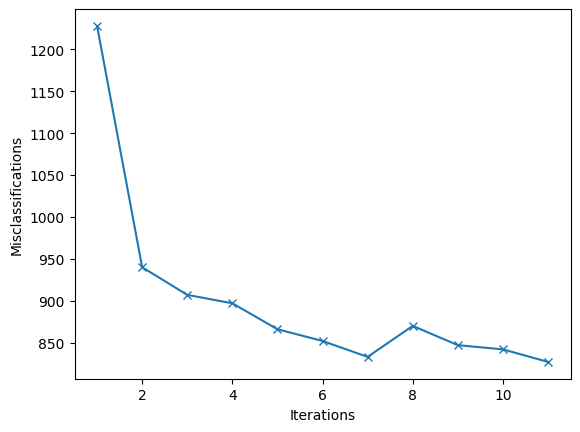

In [16]:
#Visulasing the error
plt.plot(range(1, len(perceptronEE.errors_)+1), perceptronEE.errors_, marker='x')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

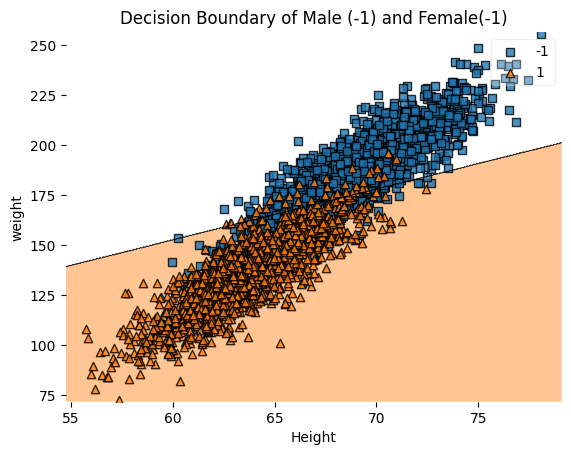

In [23]:
# Random data

np.random.seed(0)

# Generate random inputs within the range of the maximum values in X
random_inputs = np.random.rand(5000, 2) * X.max(axis=0)

# Use the trained perceptron to make predictions
predictions = perceptronEE.predict(random_inputs)

# Plot the decision boundary using mlxtend after making predictions
plot_decision_regions(X_test, y_test, clf=perceptronEE)

plt.xlabel('Height')
plt.ylabel('weight')
plt.title('Decision Boundary of Male(-1) and Female(-1)')
plt.show()